**initialisation**

Importing packages and general settings

In [ ]:
# importing packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.special import erfinv, erf
import scipy.stats

In [ ]:
# general settings

sns.set(rc={'figure.figsize':(7,7)})

import data

In [ ]:
# import survey results csv from data folder

survey_results = pd.read_csv('data/survey_results_public.csv')

functions

In [ ]:
# define mean confidence interval

def mean_confidence_interval(data, confidence=0.95):
    '''
    returns a confidence interal of the population mean, given a sample
    in : data sample, desired confidence treshold
    out: confidence interval of population mean
    '''
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

**Research Questions 1: Do people managers make more money than single contributer**

Exploration. In this exploration, we check distributions and value counts for our variables of interest. We also create the yearly salary column, which can be composed from the existing columns.

In [ ]:
# check calue count of compensation frequency column

survey_results['CompFreq'].value_counts()

Yearly     23267
Monthly    19983
Weekly      1175
Name: CompFreq, dtype: int64

In [ ]:
# create yearly salary column and filter away values that are not realistic

survey_results['YearlySal'] = ''

for i, row in survey_results.iterrows():
    if survey_results['CompFreq'].iloc[i] == 'Yearly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i]
    elif survey_results['CompFreq'].iloc[i] == 'Monthly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i] * 12
    elif survey_results['CompFreq'].iloc[i] == 'Weekly':
        survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i] * 52
    else:
        survey_results['YearlySal'].iloc[i] = np.nan

# filtering unrealistic values (less than 10 or higher then 10mill)

survey_results[survey_results['YearlySal']>1000000] = np.nan
survey_results[survey_results['YearlySal']<10] = np.nan
        

C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_3560/3302790380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_results['YearlySal'].iloc[i] = np.nan
C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_3560/3302790380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_results['YearlySal'].iloc[i] = survey_results['CompTotal'].iloc[i]
C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_3560/3302790380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

C:\Users\n.orie\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\n.orie\AppData\Roaming\Python\Python39\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16483.,  8977.,  2456.,  1072.,   960.,   957.,   513.,   592.,
          445.,   382.]),
 array([1.00000e+01, 1.00009e+05, 2.00008e+05, 3.00007e+05, 4.00006e+05,
        5.00005e+05, 6.00004e+05, 7.00003e+05, 8.00002e+05, 9.00001e+05,
        1.00000e+06]),
 <BarContainer object of 10 artists>)

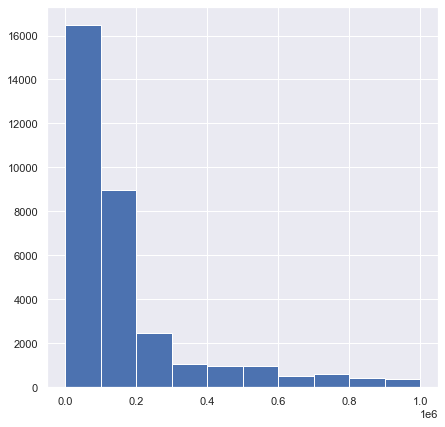

In [ ]:
# plot historgram of yearly salary to obtain insight in data distribution

plt.hist(survey_results['YearlySal'])

(array([9761., 8822., 5469., 3212., 2435., 1321.,  761.,  411.,  255.,
         125.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

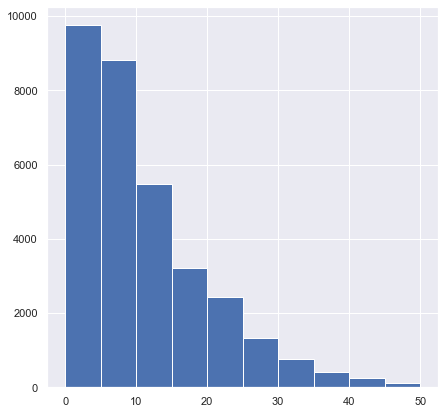

In [ ]:
# plot historgram of work experience to obtain insight in data distribution

plt.hist(survey_results['WorkExp'])

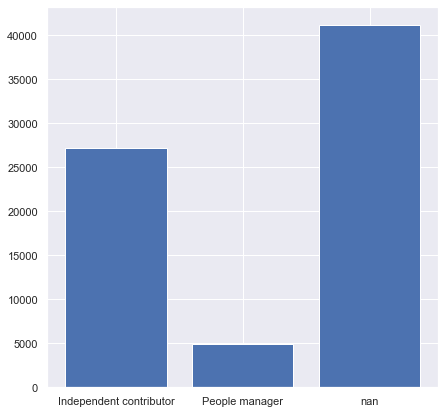

In [ ]:
# plot bar chart of ICorPM to obtain insight in data distribution

x = list(survey_results['ICorPM'])

keys, counts = np.unique(x, return_counts=True)
plt.bar(keys, counts)
plt.show()

In [ ]:
# get subsets of data where ICorPM is 'people manager' or 'independent contributor'

survey_results_PM = survey_results[survey_results['ICorPM']=='People manager']
survey_results_IC = survey_results[survey_results['ICorPM']=='Independent contributor']

c:\Users\n.orie\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


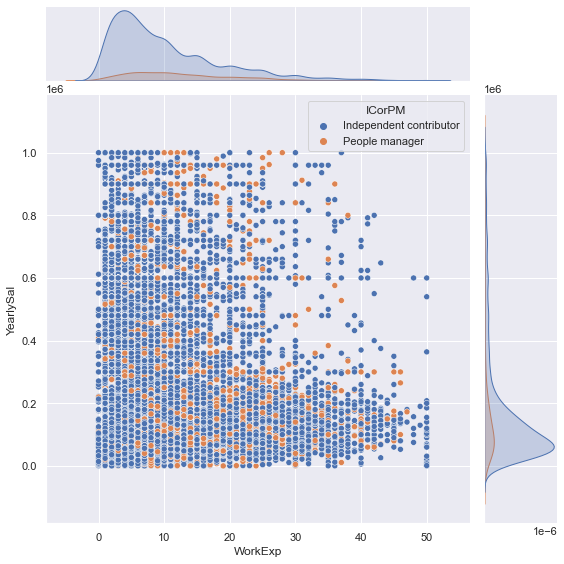

In [ ]:
# plot work experience vs yearly salary for ICorPM groups

x = 'WorkExp [yrs]'
y = 'YearlySal [USD]'

sns.jointplot(x ,y,
              data = survey_results,
              dropna = True, hue='ICorPM', height=8)


Comparing means. Below cells compare the average value and confidence interval of population mean of yearly salary of the two ICorPM groups.

In [ ]:
# check average salary for both ICorPM groups

print(np.nanmean(survey_results_PM['YearlySal']))
print(np.nanmean(survey_results_IC['YearlySal']))

In [ ]:
mean_confidence_interval(survey_results_PM['YearlySal'].dropna(), confidence=0.95)

In [ ]:
mean_confidence_interval(survey_results_IC['YearlySal'].dropna(), confidence=0.95)

**Research Questions 3: Does working experience determine salary**

Comparing means. Below cells compare the average value and confidence interval of population mean of work experience of the two ICorPM groups.

In [ ]:
print(np.nanmean(survey_results_PM['WorkExp']))
print(np.nanmean(survey_results_IC['WorkExp']))


12.867557715674362
9.902176343444884


In [ ]:
mean_confidence_interval(survey_results_PM['WorkExp'].dropna(), confidence=0.95)

In [ ]:
mean_confidence_interval(survey_results_IC['WorkExp'].dropna(), confidence=0.95)

**Research Questions 2: Do people managers make more money than single contributer, irrespective of their working experience**

<AxesSubplot: xlabel='WorkExp', ylabel='YearlySal'>

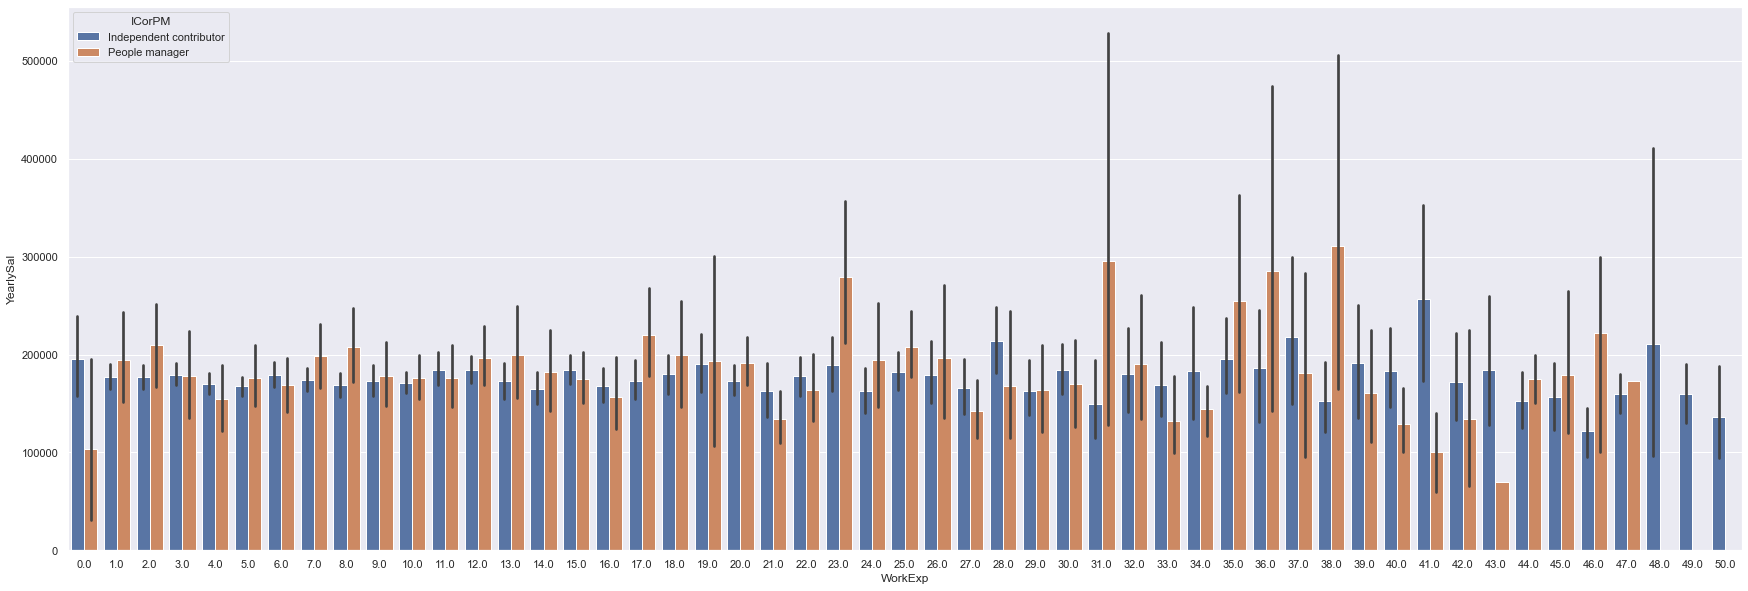

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})

sns.barplot(data=survey_results
            , x='WorkExp'
            , y="YearlySal"
            , hue="ICorPM")

In [ ]:
average_IC = []
average_PM = []

for i in range(int(np.max(survey_results['WorkExp']))):
    avg = np.nanmean(survey_results_IC[survey_results_IC['WorkExp']==i]['YearlySal'])
    average_IC.append(avg)

for i in range(int(np.max(survey_results['WorkExp']))):
    avg = np.nanmean(survey_results_PM[survey_results_PM['WorkExp']==i]['YearlySal'])
    average_PM.append(avg)

average_PM = [x for x in average_PM if str(x) != 'nan']

np.average(np.nanmean(average_PM)/(average_IC))

[103722.22222222222, 194812.3033707865, 209745.21568627452, 177869.9243697479, 154660.22068965517, 176206.08, 168875.04123711342, 198922.0578034682, 208149.87647058823, 178084.11403508772, 175960.75196850393, 176110.76923076922, 196878.81355932204, 200003.85714285713, 181744.32653061225, 175268.33695652173, 156995.6626506024, 220341.55421686746, 199993.31944444444, 193032.68181818182, 191785.68322981367, 134310.0, 163274.8, 279051.85185185185, 194000.20512820513, 207790.2857142857, 196048.0, 142504.34782608695, 168314.8, 163760.0, 169669.78723404257, 295375.0, 190363.63636363635, 132142.85714285713, 144166.66666666666, 254330.6875, 284888.8888888889, 181274.66666666666, 310833.3333333333, 160250.0, 128625.0, 100000.0, 134600.0, 70000.0, 175000.0, 178750.0, 221666.66666666666, 172500.0, nan, nan]


C:\Users\N9DCE~1.ORI\AppData\Local\Temp/ipykernel_3560/2229521243.py:9: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(survey_results_PM[survey_results_PM['WorkExp']==i]['YearlySal'])


1.0447084986921438

In [ ]:
mean_confidence_interval(average_IC, confidence=0.95)


(177428.29411174366, 171763.2896884494, 183093.2985350379)

In [ ]:
mean_confidence_interval(average_PM, confidence=0.95)

(183180.2977836797, 169564.12931146895, 196796.46625589047)

In [ ]:
survey_filtered = survey_results[['YearlySal', 'WorkExp']]

survey_filtered = survey_filtered.dropna()

In [ ]:
len(survey_filtered['WorkExp'].values)

23080

In [ ]:
np.corrcoef(survey_filtered['YearlySal'].astype(float), survey_filtered['WorkExp'].astype(float))

array([[1.        , 0.01059229],
       [0.01059229, 1.        ]])

In [ ]:
conf_bound = np.sqrt(2)*erfinv(0.95)/(0.5*np.sqrt(len(survey_filtered)))
conf_bound

0.02580240480474293

In [ ]:
survey_filtered_contr

,YearlySal,ICorPM
8,46000.0,0
11,194400.0,0
12,65000.0,0
14,110000.0,0
21,32000.0,0
...,...,...
73254,115000.0,0
73259,96000.0,0
73261,36000.0,0
73263,60000.0,0


In [ ]:
survey_filtered_contr = survey_results[['YearlySal', 'ICorPM']].dropna()

survey_filtered_contr = survey_filtered_contr.replace(to_replace=r'Independent contributor' , value = int(0))
survey_filtered_contr = survey_filtered_contr.replace(to_replace=r'People manager' , value = int(1))


survey_filtered_contr.corr()

conf_bound = np.sqrt(2)*erfinv(0.95)/(0.5*np.sqrt(len(survey_filtered_contr)))

In [ ]:
mean_confidence_interval(survey_results_PM['YearlySal'].dropna(), confidence=0.95)

In [ ]:
mean_confidence_interval(survey_results_PM['YearlySal'].dropna(), confidence=0.95)

In [ ]:
conf_bound

0.02600544955701411

In [ ]:
survey_filtered_contr.corr()

,YearlySal,ICorPM
YearlySal,1.000000,0.017878
ICorPM,0.017878,1.000000
